In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
df = pd.read_csv("bodyfat.csv")
data = pd.read_csv("bodyfat.csv")

In [3]:
df.corr()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
Density,1.000000,-0.987782,-0.277637,-0.594062,0.097881,-0.472966,-0.682599,-0.798955,-0.609331,-0.553091,-0.495040,-0.264890,-0.487109,-0.351648,-0.325716
BodyFat,-0.987782,1.000000,0.291458,0.612414,-0.089495,0.490592,0.702620,0.813432,0.625201,0.559608,0.508665,0.265970,0.493271,0.361387,0.346575
Age,-0.277637,0.291458,1.000000,-0.012746,-0.171645,0.113505,0.176450,0.230409,-0.050332,-0.200096,0.017516,-0.105058,-0.041162,-0.085056,0.213531
Weight,-0.594062,0.612414,-0.012746,1.000000,0.308279,0.830716,0.894191,0.887995,0.940884,0.868694,0.853167,0.613685,0.800416,0.630301,0.729775
Height,0.097881,-0.089495,-0.171645,0.308279,1.000000,0.253710,0.134892,0.087813,0.170394,0.148436,0.286053,0.264744,0.207816,0.228649,0.322065
Neck,-0.472966,0.490592,0.113505,0.830716,0.253710,1.000000,0.784835,0.754077,0.734958,0.695697,0.672405,0.477892,0.731146,0.623660,0.744826
Chest,-0.682599,0.702620,0.176450,0.894191,0.134892,0.784835,1.000000,0.915828,0.829420,0.729859,0.719496,0.482988,0.727907,0.580173,0.660162
Abdomen,-0.798955,0.813432,0.230409,0.887995,0.087813,0.754077,0.915828,1.000000,0.874066,0.766624,0.737179,0.453223,0.684983,0.503316,0.619832
Hip,-0.609331,0.625201,-0.050332,0.940884,0.170394,0.734958,0.829420,0.874066,1.000000,0.896410,0.823473,0.558387,0.739273,0.545014,0.630090
Thigh,-0.553091,0.559608,-0.200096,0.868694,0.148436,0.695697,0.729859,0.766624,0.896410,1.000000,0.799170,0.539797,0.761477,0.566842,0.558685


In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:>

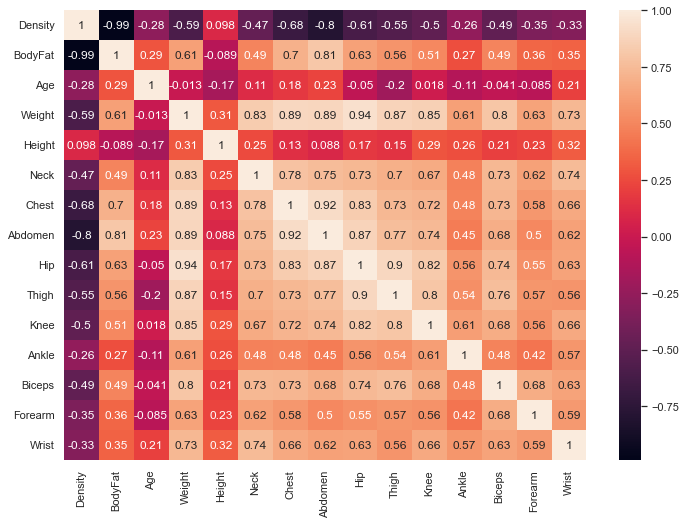

In [31]:
sns.heatmap(df.corr(), annot = True)

In [6]:
abs(df.corr()).sum() - 1

Density    6.998708
BodyFat    7.148471
Age        1.986601
Weight     9.577325
Height     2.771872
Neck       8.380987
Chest      9.021419
Abdomen    9.127732
Hip        9.027232
Thigh      8.644485
Knee       8.422888
Ankle      6.108341
Biceps     8.148504
Forearm    6.714838
Wrist      7.599674
dtype: float64

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [8]:
df["BodyFat"].describe()

count    252.000000
mean      19.150794
std        8.368740
min        0.000000
25%       12.475000
50%       19.200000
75%       25.300000
max       47.500000
Name: BodyFat, dtype: float64

In [9]:
def pca_scale_test(data, i):
    pca = PCA(n_components = i)
    sc_X = StandardScaler()
    sc_Y = StandardScaler()
    data_df = pd.DataFrame(data, columns = df.columns)
    X = data_df.copy()
    Y = X["BodyFat"].to_numpy().reshape(-1, 1)
    X.drop(['BodyFat', 'Density'], axis = 1, inplace = True)
    X = sc_X.fit_transform(X)
    X = pca.fit_transform(X)
    Y = sc_Y.fit_transform(Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    print('n_components =', i)
    print(mean_squared_error(y_test, y_predict))
    print(mean_squared_error(sc_Y.inverse_transform(y_test), sc_Y.inverse_transform(y_predict)))
    print()

In [10]:
for i in range(1, data.shape[1] - 1):
    pca_scale_test(data, i)

n_components = 1
0.5671666816297484
39.56435450268283

n_components = 2
0.4562229684486587
31.825154475051363

n_components = 3
0.39892456642212826
27.828138494315752

n_components = 4
0.41540198472864376
28.97756853011174

n_components = 5
0.4209024440604723
29.361269001209095

n_components = 6
0.3727298714130963
26.000851679002523

n_components = 7
0.3067885262350532
21.400922167079948

n_components = 8
0.31754819659654715
22.151494135255

n_components = 9
0.31391600652618656
21.898120197364413

n_components = 10
0.3081346768220416
21.494826799990612

n_components = 11
0.3016676969386521
21.04370388858664

n_components = 12
0.288025411288691
20.09204674234709

n_components = 13
0.2840428342335177
19.814230545541676



In [11]:
def pca_scale_poly_test(data, i, degree = 2):
    poly = PolynomialFeatures(degree = degree)
    pca = PCA(n_components = i)
    sc_X = StandardScaler()
    sc_Y = StandardScaler()
    data_df = pd.DataFrame(data, columns = df.columns)
    X = data_df.copy()
    Y = X["BodyFat"].to_numpy().reshape(-1, 1)
    X.drop(['BodyFat', 'Density'], axis = 1, inplace = True)
    X = sc_X.fit_transform(X)
    X = pca.fit_transform(X)
    X = poly.fit_transform(X)
    Y = sc_Y.fit_transform(Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    print('n_components =', i, 'degree =', degree)
    print(mean_squared_error(y_test, y_predict))
    print(mean_squared_error(sc_Y.inverse_transform(y_test), sc_Y.inverse_transform(y_predict)))
    print()

In [12]:
for j in range(1, 3):
    for i in range(1, data.shape[1] - 1):
        pca_scale_poly_test(data, i, j)

n_components = 1 degree = 1
0.5671666816297484
39.56435450268283

n_components = 2 degree = 1
0.4562229684486587
31.825154475051356

n_components = 3 degree = 1
0.3989245664221286
27.828138494315777

n_components = 4 degree = 1
0.4154019847286439
28.97756853011174

n_components = 5 degree = 1
0.42090244406047284
29.361269001209134

n_components = 6 degree = 1
0.3727298714130963
26.000851679002526

n_components = 7 degree = 1
0.3067885262350531
21.400922167079937

n_components = 8 degree = 1
0.31754819659654754
22.151494135255028

n_components = 9 degree = 1
0.3139160065261863
21.898120197364385

n_components = 10 degree = 1
0.3081346768220398
21.49482679999049

n_components = 11 degree = 1
0.30166769693864914
21.04370388858644

n_components = 12 degree = 1
0.2880254112886898
20.092046742347016

n_components = 13 degree = 1
0.28404283423351684
19.81423054554161

n_components = 1 degree = 2
0.5349480616051446
37.31685135144379

n_components = 2 degree = 2
0.425787546806825
29.70204349149

In [13]:
def pca_test(data, i):
    pca = PCA(n_components = i)
    data_df = pd.DataFrame(data, columns = df.columns)
    X = data_df.copy()
    Y = X["BodyFat"].to_numpy().reshape(-1, 1)
    X.drop(['BodyFat', 'Density'], axis = 1, inplace = True)
    X = pca.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    print('n_components =', i)
    print(mean_squared_error(y_test, y_predict))
    print()

In [14]:
for i in range(1, data.shape[1] - 1):
    pca_test(data, i)

n_components = 1
37.649940091133324

n_components = 2
31.593631161997738

n_components = 3
21.288573241124492

n_components = 4
21.24407267717221

n_components = 5
22.21218880765091

n_components = 6
21.701597751237127

n_components = 7
21.92269701357244

n_components = 8
22.123328539718887

n_components = 9
21.720355790138694

n_components = 10
22.031710242251442

n_components = 11
21.12747401600842

n_components = 12
20.9311816539384

n_components = 13
19.814230545541516



In [15]:
def scale_test(data):
    sc_X = StandardScaler()
    sc_Y = StandardScaler()
    data_df = pd.DataFrame(data, columns = df.columns)
    X = data_df.copy()
    Y = X["BodyFat"].to_numpy().reshape(-1, 1)
    X.drop(['BodyFat', 'Density'], axis = 1, inplace = True)
    X = sc_X.fit_transform(X)
    Y = sc_Y.fit_transform(Y)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_predict = reg.predict(X_test)
    print('n_components =', i)
    print(mean_squared_error(y_test, y_predict))
    print(mean_squared_error(sc_Y.inverse_transform(y_test), sc_Y.inverse_transform(y_predict)))
    print()

In [16]:
scale_test(data)

n_components = 13
0.2840428342335169
19.814230545541612



In [17]:
def ridge_test(data, alpha):
    data_df = pd.DataFrame(data, columns = df.columns)
    X = data_df.copy()
    Y = X["BodyFat"].to_numpy().reshape(-1, 1)
    X.drop(['BodyFat', 'Density'], axis = 1, inplace = True)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    clf = Ridge(alpha = alpha)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(mean_squared_error(y_test, y_predict))

In [18]:
for i in np.arange(0.01, 0.4, 0.01):
    ridge_test(data, i)

19.814376155329857
19.814521732552894
19.814667277190445
19.814812789222053
19.814958268627578
19.815103715386858
19.815249129479803
19.815394510886343
19.815539859586547
19.81568517556056
19.815830458788536
19.815975709250687
19.81612092692738
19.816266111799006
19.81641126384596
19.81655638304884
19.81670146938824
19.81684652284473
19.816991543399133
19.81713653103213
19.817281485724756
19.817426407457777
19.81757129621231
19.817716151969325
19.81786097471001
19.818005764415584
19.818150521067224
19.818295244646364
19.81843993513426
19.81858459251254
19.818729216762605
19.818873807866098
19.81901836580469
19.81916289056009
19.819307382114136
19.81945184044861
19.81959626554548
19.81974065738669
19.819885015954316


In [19]:
def lasso_test(data, alpha):
    data_df = pd.DataFrame(data, columns = df.columns)
    X = data_df.copy()
    Y = X["BodyFat"].to_numpy().reshape(-1, 1)
    X.drop(['BodyFat', 'Density'], axis = 1, inplace = True)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    clf = Lasso(alpha = alpha)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    print(mean_squared_error(y_test, y_predict))

In [20]:
for i in np.arange(0.01, 0.4, 0.01):
    lasso_test(data, i)

19.838552585192186
19.8643389873545
19.891591384629432
19.920308387508015
19.954838590719845
19.99613750931525
20.038800183567997
20.08282672701526
20.128219346460554
20.174978374152875
20.22310376958613
20.272590423151506
20.323448283770055
20.375667173314326
20.429257693263505
20.484213228194115
20.51043374642649
20.530196595329468
20.55118019898766
20.573395169654095
20.596842531685517
20.621527200696296
20.64339072320027
20.663324107482982
20.684168025303908
20.70592241647482
20.728587345800772
20.752162719644637
20.776648563571392
20.80204559069661
20.828325992296392
20.85556401381604
20.883662235324945
20.91637290005738
20.951122975351534
20.969898608525266
20.97482073347497
20.98022416170704
20.986126676102806


In [24]:
pca = PCA(n_components = 7)
data_df = pd.DataFrame(data, columns = df.columns)
X = data_df.copy()
Y = X["BodyFat"].to_numpy().reshape(-1, 1)
X.drop(['BodyFat', 'Density'], axis = 1, inplace = True)
X = pca.fit_transform(X)

In [25]:
X = pd.DataFrame(X)

<AxesSubplot:>

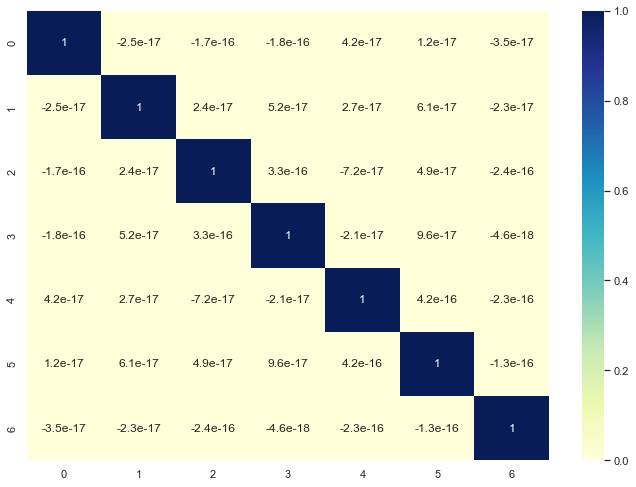

In [32]:
sns.heatmap(X.corr(), annot = True, cmap="YlGnBu")